## **Import the required libraries**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
%pylab inline
from scipy.stats import norm
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb





Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## **Reading and understanding our data**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/data/2016-2022_Umrah.xlsx")
df.head(10)

,Age Group,Gender,Nationality (Saudi/non-Saudi),Year,Internal/external,Number of Umrah Performers
0,0 - 9,M,Saudi,2022,Internal,121695.0
1,10 - 19,M,Saudi,2022,Internal,689458.0
2,20 - 29,M,Saudi,2022,Internal,924043.0
3,30 - 39,M,Saudi,2022,Internal,706348.0
4,40 - 49,M,Saudi,2022,Internal,434121.0
5,50 - 59,M,Saudi,2022,Internal,274971.0
6,60+,M,Saudi,2022,Internal,174615.0
7,0 - 9,F,Saudi,2022,Internal,102547.0
8,10 - 19,F,Saudi,2022,Internal,567743.0
9,20 - 29,F,Saudi,2022,Internal,819114.0


# **Exploratory** **data analysis - EDA 📊**

In [ ]:
df.info() #find more information about the features and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age Group                      266 non-null    object 
 1   Gender                         266 non-null    object 
 2   Nationality (Saudi/non-Saudi)  196 non-null    object 
 3   Year                           266 non-null    int64  
 4   Internal/external              238 non-null    object 
 5   Number of Umrah Performers     266 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 12.6+ KB


In [ ]:
df.shape
# number of rows is 266 and the columns is 6

(266, 6)

In [ ]:
df["Number of Umrah Performers"].describe()

count    2.660000e+02
mean     3.639167e+05
std      3.638202e+05
min      0.000000e+00
25%      1.169238e+05
50%      2.799233e+05
75%      5.006838e+05
max      2.866818e+06
Name: Number of Umrah Performers, dtype: float64

In [ ]:
df.nunique()

Age Group                          7
Gender                             2
Nationality (Saudi/non-Saudi)      3
Year                               7
Internal/external                  2
Number of Umrah Performers       259
dtype: int64

#**Preprocess the Data**

In [ ]:
df['Nationality (Saudi/non-Saudi)'] = df['Nationality (Saudi/non-Saudi)'].replace({'Saudia': 'Saudi'})


In [ ]:
df = df.drop(columns=(['Internal/external'])) #  not related to any features

In [ ]:
df.isnull().sum() # to check the presence of missing value

Age Group                         0
Gender                            0
Nationality (Saudi/non-Saudi)    70
Year                              0
Number of Umrah Performers        0
dtype: int64

## **Visualizing age group , gender , and nationality**
(**Categorical Varibles**)


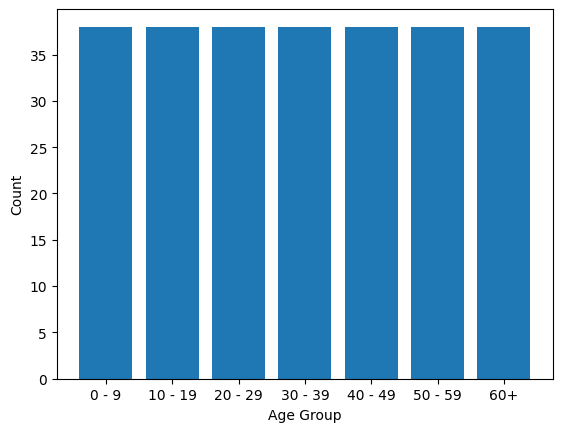

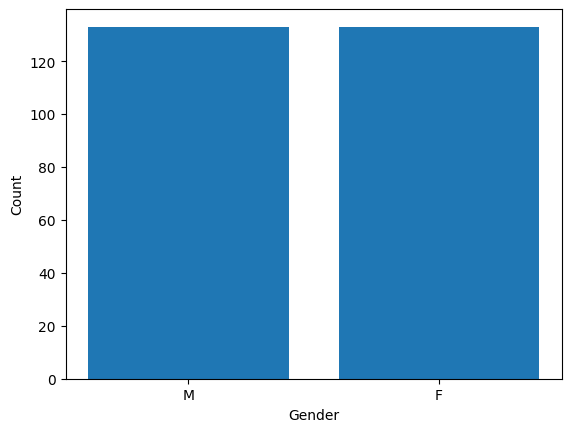

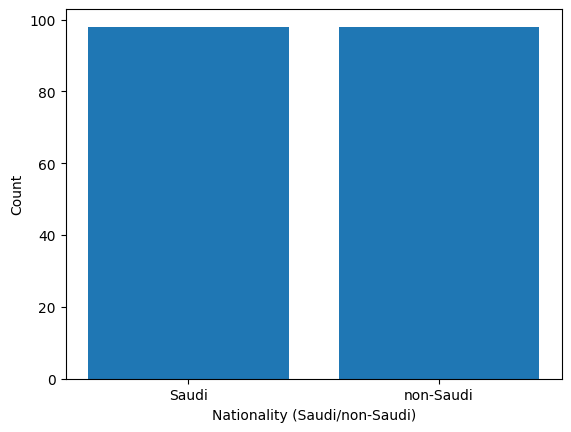

In [ ]:

#Age Group
age_group_counts = df['Age Group '].value_counts()
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
#Gender
Gender_counts = df['Gender'].value_counts()
plt.bar(Gender_counts.index, Gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
#Nationality
Nationality_counts = df['Nationality (Saudi/non-Saudi)'].value_counts()
plt.bar(Nationality_counts .index, Nationality_counts .values)
plt.xlabel('Nationality (Saudi/non-Saudi)')
plt.ylabel('Count')
plt.show()

## **Visualizing Number of Umrah performers, and year**
(**Numerical Varibles**)

<ipython-input-12-297c238d3b01>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


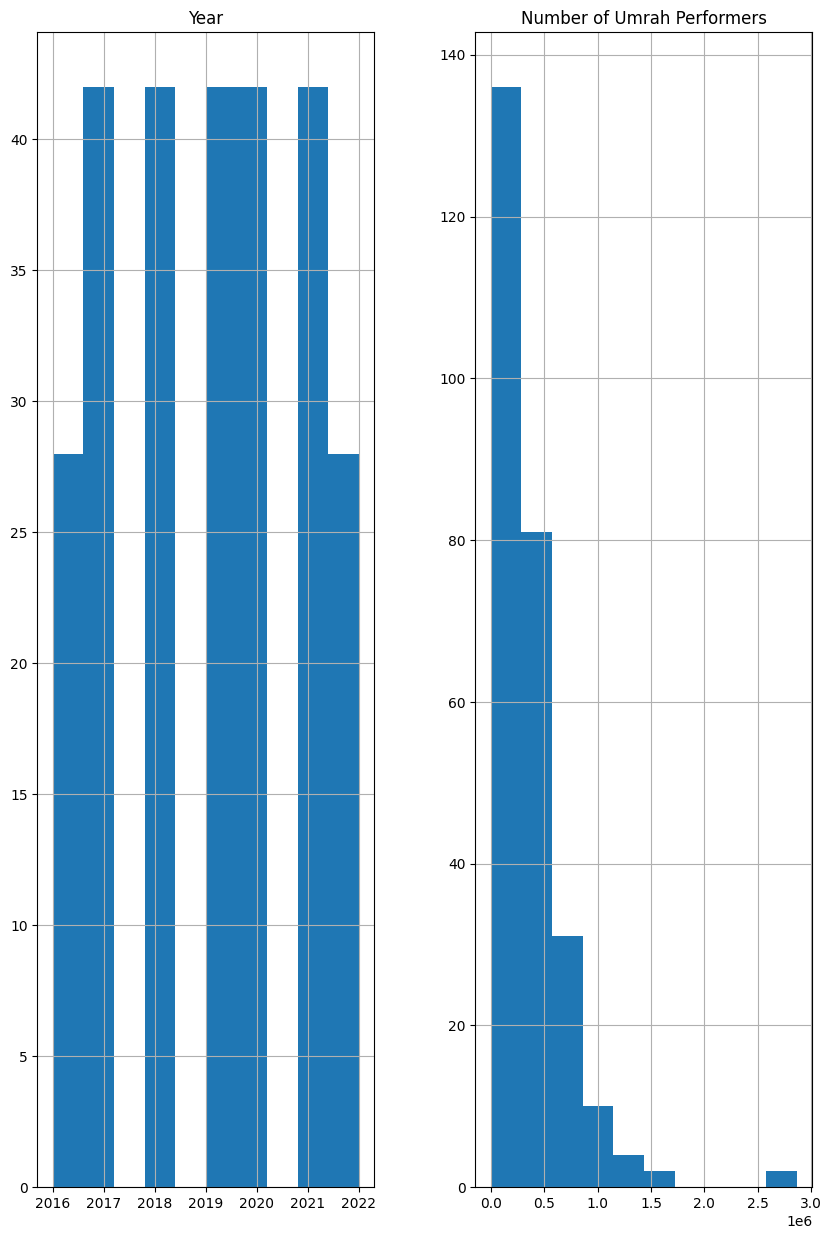

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

# **BoxPlot**
 (**detecting potential outliers**).

<ipython-input-13-3fb9066dad04>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Number of Umrah Performers'])


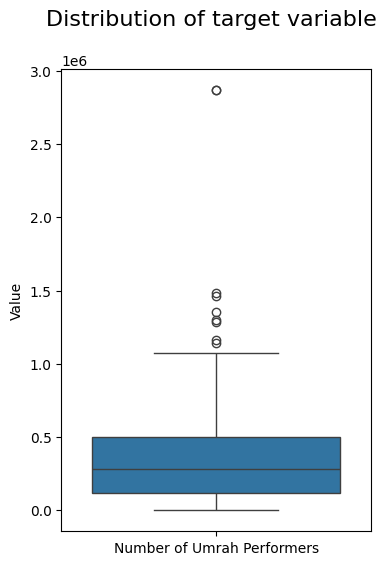

In [ ]:
# boxplot comparison
fig = plt.figure(figsize=(4,6))
fig.suptitle('Distribution of target variable', fontsize=16)
ax = fig.add_subplot(111)
sns.boxplot(data=df["Number of Umrah Performers"])
ax.set_xticklabels(['Number of Umrah Performers'])
ax.set_ylabel("Value")
plt.show()

## **Handling the Duplicates**

In [ ]:
list(df.columns)

['Age Group ',
 'Gender',
 'Nationality (Saudi/non-Saudi)',
 'Year',
 'Number of Umrah Performers']

In [ ]:
duplicate = df[df.duplicated(list(df.columns))]
duplicate

,Age Group,Gender,Nationality (Saudi/non-Saudi),Year,Number of Umrah Performers


## **Handling the Missing Values**


Text(0.5, 1.0, 'Total Missing Values')

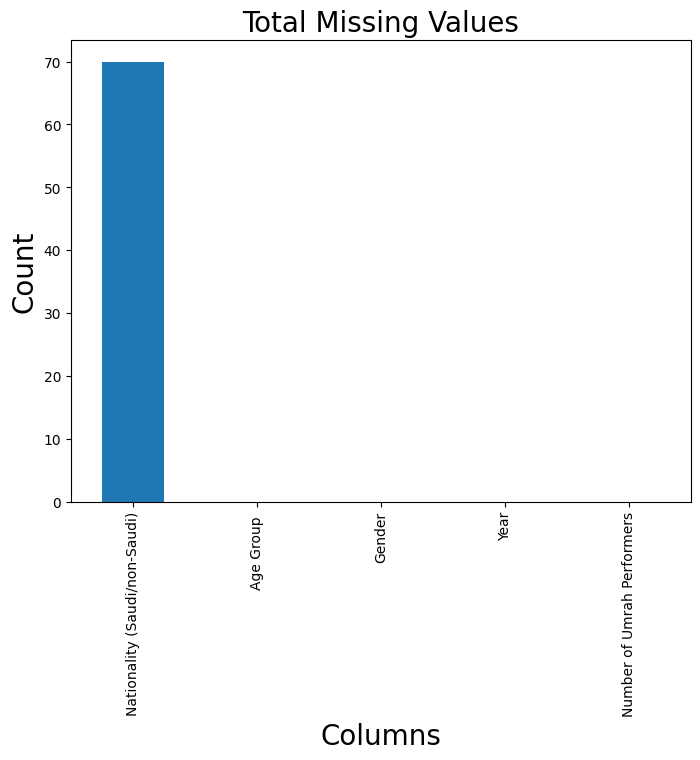

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [ ]:
# Define imputation categories
impute_dict = {'Age Group': 'Unknown', 'Gender': 'Unknown', 'Nationality (Saudi/non-Saudi)': 'Unknown'}

# Replace missing values
df = df.fillna(impute_dict)

In [ ]:
df.info() #find more information about the features and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age Group                      266 non-null    object 
 1   Gender                         266 non-null    object 
 2   Nationality (Saudi/non-Saudi)  266 non-null    object 
 3   Year                           266 non-null    int64  
 4   Number of Umrah Performers     266 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 10.5+ KB


In [ ]:
df['Age Group '].unique().tolist()

['0 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']

In [ ]:
df['Gender'].unique().tolist()

['M', 'F']

In [ ]:
df['Nationality (Saudi/non-Saudi)'].unique().tolist()

['Saudi', 'non-Saudi', 'Unknown']

In [ ]:
df['Nationality (Saudi/non-Saudi)'].value_counts()

Nationality (Saudi/non-Saudi)
Saudi        98
non-Saudi    98
Unknown      70
Name: count, dtype: int64

In [ ]:
df['Nationality (Saudi/non-Saudi)']=df['Nationality (Saudi/non-Saudi)'].map({'Saudia': 'Saudi', 'non-Saudi':'non-Saudi', 'Saudi':'Saudi', 'Unknown':'Unknown' } )

In [ ]:
df['Nationality (Saudi/non-Saudi)'].value_counts()

Nationality (Saudi/non-Saudi)
Saudi        98
non-Saudi    98
Unknown      70
Name: count, dtype: int64

In [ ]:
df['Year'].unique().tolist()

[2022, 2021, 2020, 2019, 2018, 2017, 2016]

In [ ]:
#df['Internal/external'].unique().tolist()

In [ ]:
no_byYear = df.groupby(['Year', 'Nationality (Saudi/non-Saudi)'])['Number of Umrah Performers'].mean().reset_index(name ='Number of Umrah Performers').round(2)

In [ ]:
fig = px.line(no_byYear
                   ,x='Year', y = "Number of Umrah Performers",
                   color = "Nationality (Saudi/non-Saudi)", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Number of Umrah Performers per Nantionality",
    xaxis_title="Year",
    yaxis_title="Number of Umrah Performers")
fig.show()

## **One Hot Encoding**


Now, to be recognized by a machine learning algorithms, our categorical variables should be converted into numerical ones.

In [ ]:
df1 = pd.get_dummies(data=df, columns = ['Age Group ',
 'Gender',
 'Nationality (Saudi/non-Saudi)',
 #'Internal/external'#
                                         ])

In [ ]:
df1.head()

,Year,Number of Umrah Performers,Age Group _0 - 9,Age Group _10 - 19,Age Group _20 - 29,Age Group _30 - 39,Age Group _40 - 49,Age Group _50 - 59,Age Group _60+,Gender_F,Gender_M,Nationality (Saudi/non-Saudi)_Saudi,Nationality (Saudi/non-Saudi)_Unknown,Nationality (Saudi/non-Saudi)_non-Saudi
0,2022,121695.0,True,False,False,False,False,False,False,False,True,True,False,False
1,2022,689458.0,False,True,False,False,False,False,False,False,True,True,False,False
2,2022,924043.0,False,False,True,False,False,False,False,False,True,True,False,False
3,2022,706348.0,False,False,False,True,False,False,False,False,True,True,False,False
4,2022,434121.0,False,False,False,False,True,False,False,False,True,True,False,False


In [ ]:
df1.shape

(266, 14)

In [ ]:
#Rearrange the attributes and predictor variable
df2=df1.loc[:, df1. columns != 'Number of Umrah Performers']
df2['Number of Umrah Performers']=df1['Number of Umrah Performers']
df2.head()

,Year,Age Group _0 - 9,Age Group _10 - 19,Age Group _20 - 29,Age Group _30 - 39,Age Group _40 - 49,Age Group _50 - 59,Age Group _60+,Gender_F,Gender_M,Nationality (Saudi/non-Saudi)_Saudi,Nationality (Saudi/non-Saudi)_Unknown,Nationality (Saudi/non-Saudi)_non-Saudi,Number of Umrah Performers
0,2022,True,False,False,False,False,False,False,False,True,True,False,False,121695.0
1,2022,False,True,False,False,False,False,False,False,True,True,False,False,689458.0
2,2022,False,False,True,False,False,False,False,False,True,True,False,False,924043.0
3,2022,False,False,False,True,False,False,False,False,True,True,False,False,706348.0
4,2022,False,False,False,False,True,False,False,False,True,True,False,False,434121.0


In [ ]:
df2.shape

(266, 14)

# **Models and Evaluation**


just to test that the dataset is ready to be trained

In [ ]:
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

#RandomForestRegressor

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200) #random_state 4 or 120 or 200 was the best

In [ ]:
# Setting up the parameter grid for grid search on RandomForestRegressor
RF_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#train the model
rf = RandomForestRegressor(random_state=200)
grid_search = GridSearchCV(estimator=rf, param_grid=RF_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

#Print the best params
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 216 candidates, totalling 648 fits


{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
RF_model = RandomForestRegressor(**best_params,random_state=200)

RF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=200)

### Calculate Performance Metrics

In [ ]:
RF_y_pred =RF_model.predict(X_test)
r2_RF = r2_score(y_test, RF_y_pred)

print("R-squared:", r2_RF)
mse_RF = mean_squared_error(y_test, RF_y_pred)
print(f'Mean Squared Error: {mse_RF}')

R-squared: 0.8227907113488124
Mean Squared Error: 10954178629.400229


##Plotting the actual vs predicted values

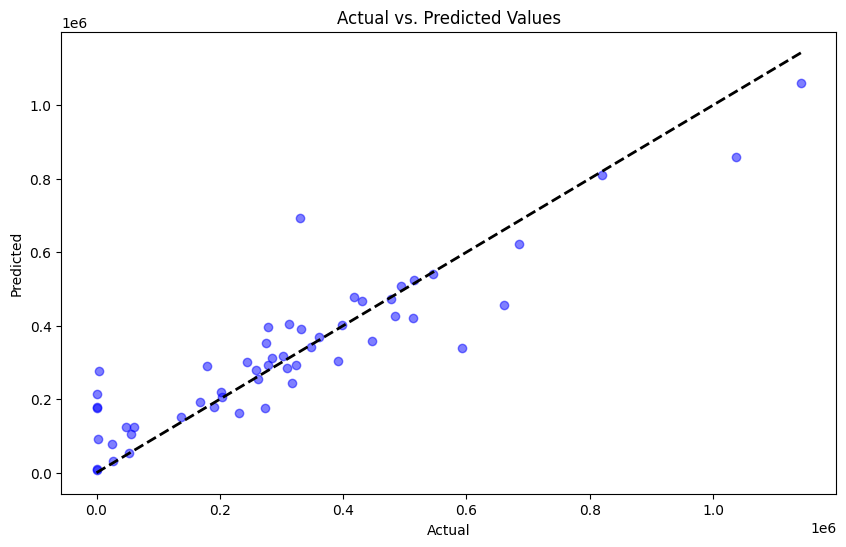

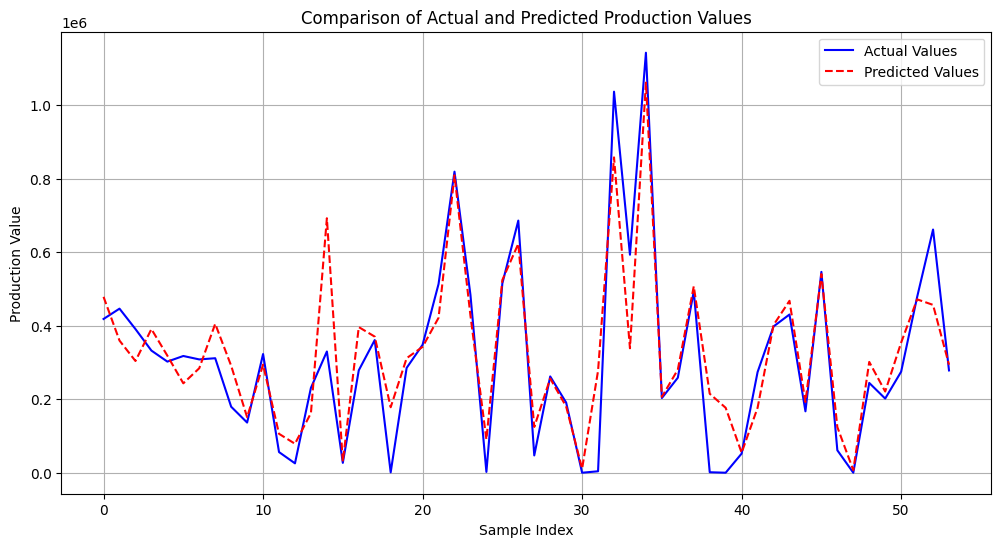

In [ ]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, RF_y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # draw a line through the main diagonal
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Values', color='blue')  # reset_index for clean plotting
plt.plot(RF_y_pred, label='Predicted Values', linestyle='--', color='red')
plt.title('Comparison of Actual and Predicted Production Values')
plt.xlabel('Sample Index')
plt.ylabel('Production Value')
plt.legend()
plt.grid(True)
plt.show()


## Implementing explainable AI (XAI)

In [ ]:
pip install numpy pandas scikit-learn shap

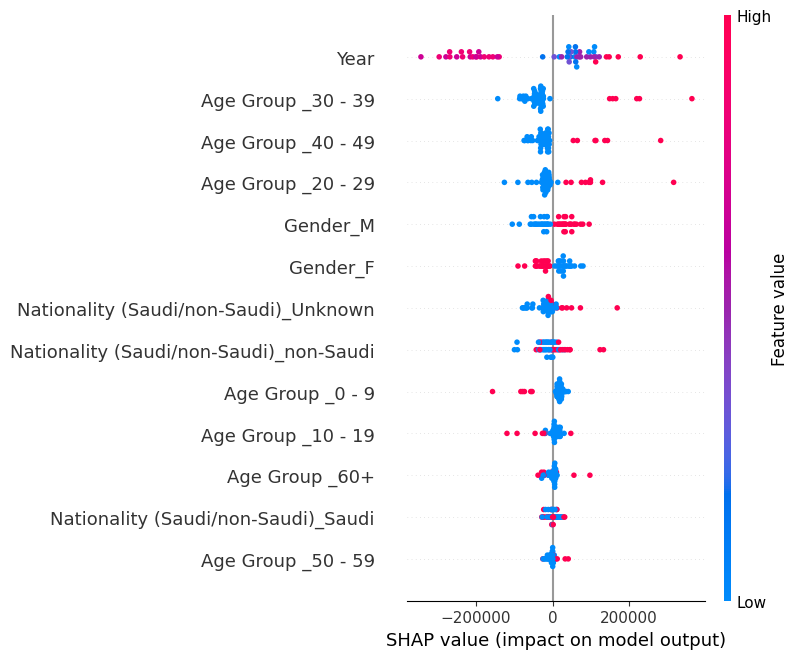

In [ ]:
import shap
# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(RF_model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

# Visualize the SHAP values for all predictions in the test set
shap.summary_plot(shap_values, X_test)

#**GradientBoostingRegressor**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #random_state 4 or 120 or 200 was the best


In [ ]:
GB_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

gb_regressor = GradientBoostingRegressor(random_state=1)

grid_search = GridSearchCV(estimator=gb_regressor, param_grid=GB_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)





Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


###Train the Model

In [ ]:
# Initialize the regressor with the best parameters found
GB_model = GradientBoostingRegressor(**best_params, random_state=42)

GB_model.fit(X_train, y_train)

GB_y_pred = GB_model.predict(X_test)


### Calculate Performance Metrics

In [ ]:

mse_GB = mean_squared_error(y_test, GB_y_pred)
r2_GB = r2_score(y_test, GB_y_pred)

print(f"R-squared: {r2_GB}")
print(f"Mean Squared Error: {mse_GB}")

R-squared: 0.8299431797403123
Mean Squared Error: 13103788222.437012


###Plotting the actual vs predicted values

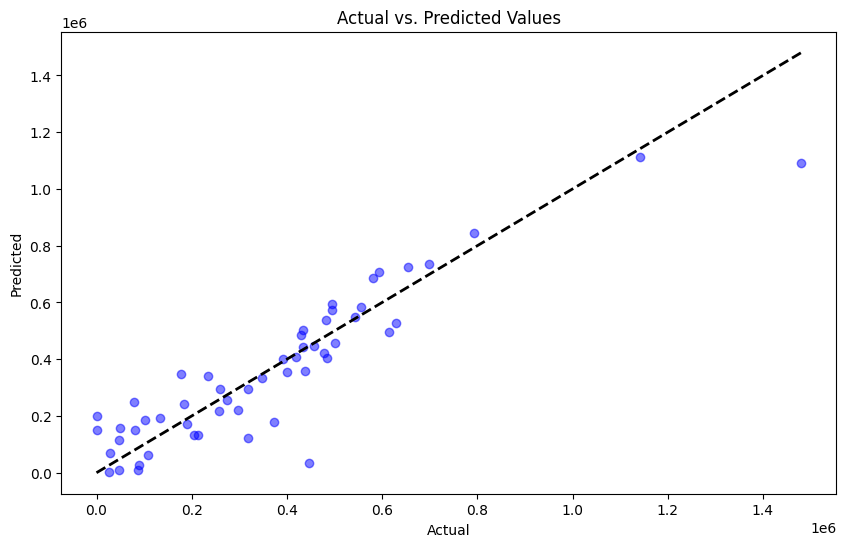

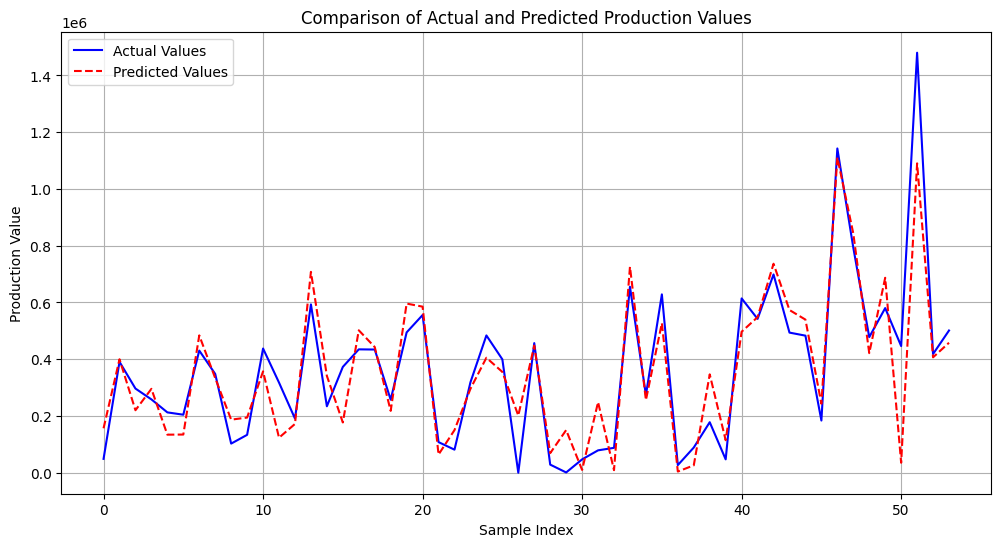

In [ ]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, GB_y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # draw a line through the main diagonal
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Values', color='blue')  # reset_index for clean plotting
plt.plot(GB_y_pred, label='Predicted Values', linestyle='--', color='red')
plt.title('Comparison of Actual and Predicted Production Values')
plt.xlabel('Sample Index')
plt.ylabel('Production Value')
plt.legend()
plt.grid(True)
plt.show()

## Implementing explainable AI (XAI)

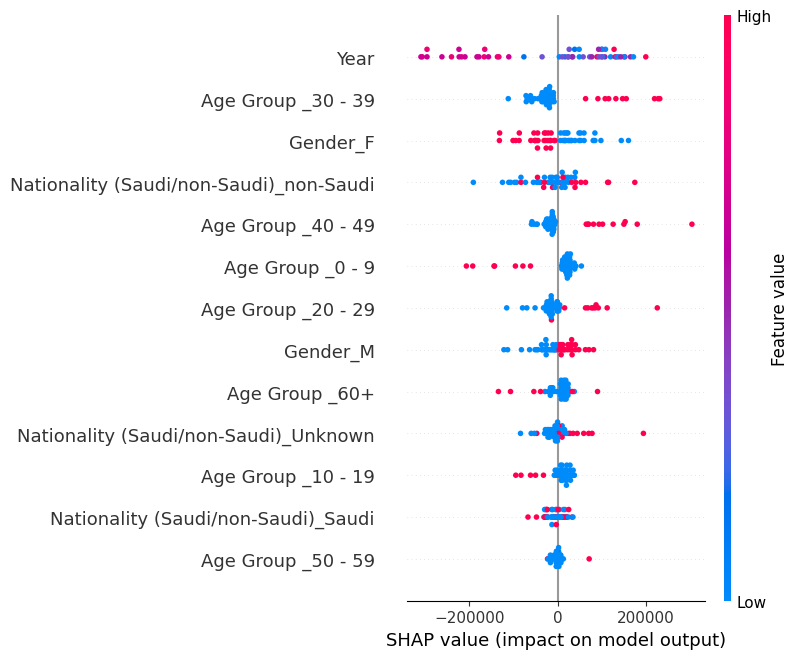

In [ ]:
import shap
# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(GB_model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

# Visualize the SHAP values for all predictions in the test set
shap.summary_plot(shap_values, X_test)

#**Linear Regression model**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) #random_state 4 or 120 or 200 was the best

In [ ]:
LR_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [-1]
}


linear_reg = LinearRegression()

# Perform Grid Search
grid_search = GridSearchCV(estimator=linear_reg, param_grid=LR_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_linear_reg = grid_search.best_estimator_

# Make predictions with the best model
y_pred_LR = best_linear_reg.predict(X_test)





Best Parameters: {'fit_intercept': True, 'n_jobs': -1}


### Calculate Performance Metrics

In [ ]:
# Calculate R-squared
r_squared_LR = r2_score(y_test, y_pred_LR)
print("R-squared:", r_squared_LR)

mse_LR = mean_squared_error(y_test, y_pred_LR)
print("Mean Squared Error:", mse_LR)

R-squared: 0.3141360970045298
Mean Squared Error: 55586674022.77239


### Plotting the actual vs predicted values

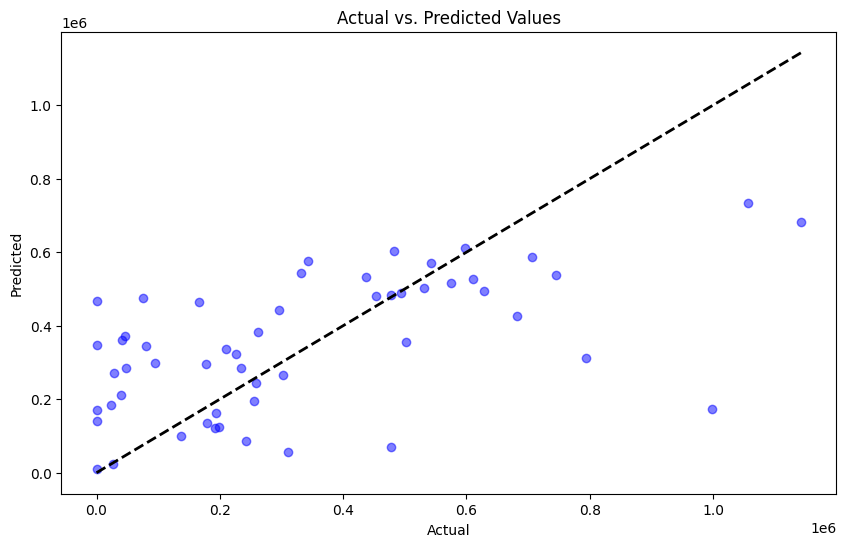

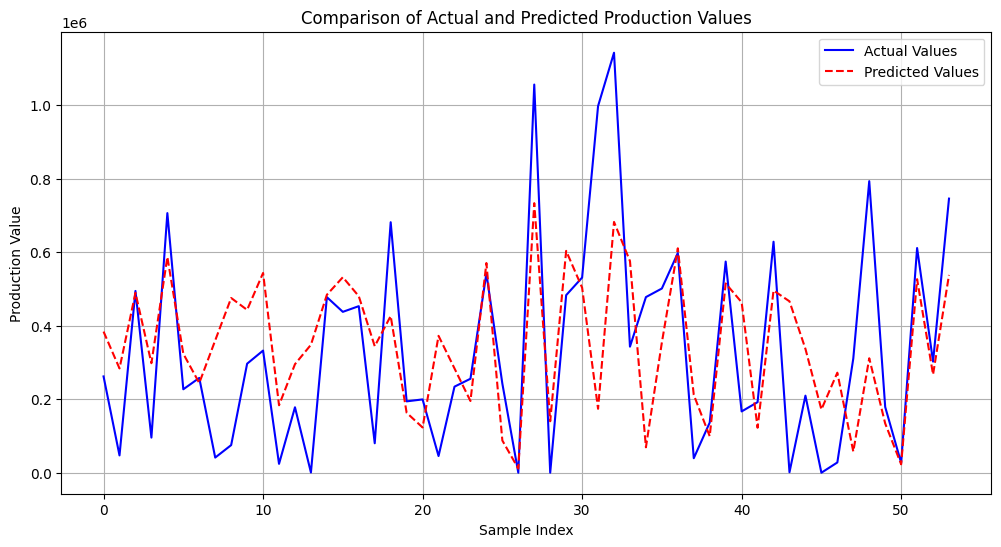

In [ ]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_LR, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # draw a line through the main diagonal
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Values', color='blue')  # reset_index for clean plotting
plt.plot(y_pred_LR, label='Predicted Values', linestyle='--', color='red')
plt.title('Comparison of Actual and Predicted Production Values')
plt.xlabel('Sample Index')
plt.ylabel('Production Value')
plt.legend()
plt.grid(True)
plt.show()


# KNeighborsRegressor

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #random_state 4 or 120 or 200 was the best

In [ ]:
KN_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}


knn_reg = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=knn_reg, param_grid=KN_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_knn_reg = grid_search.best_estimator_

# Make predictions with the best model
KN_y_pred = best_knn_reg.predict(X_test)



Best Parameters: {'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


### Calculate Performance Metrics

In [ ]:
# Calculate R-squared
r_squared_KN = r2_score(y_test, KN_y_pred)
print("R-squared:", r_squared_KN)


mse_KN = mean_squared_error(y_test, KN_y_pred)
print("Mean Squared Error:", mse_KN)


R-squared: 0.7058283862564988
Mean Squared Error: 22667497379.17544


### Plotting the actual vs predicted values

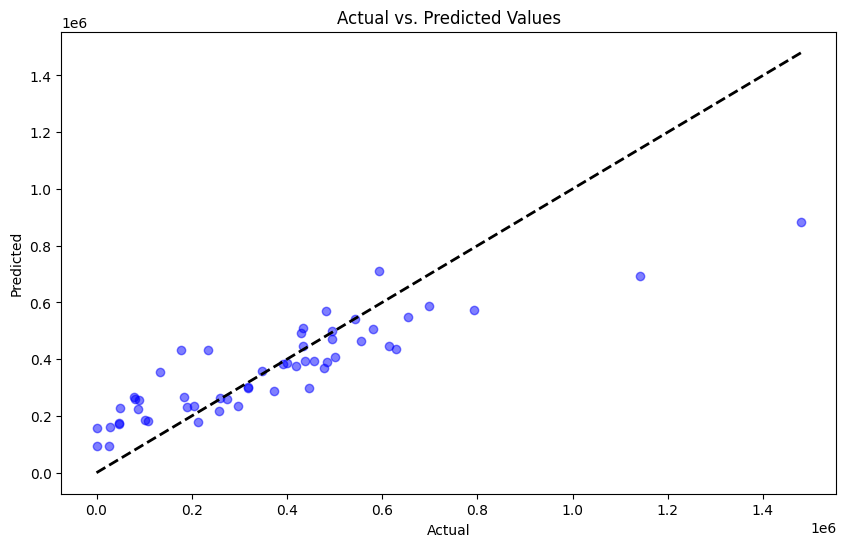

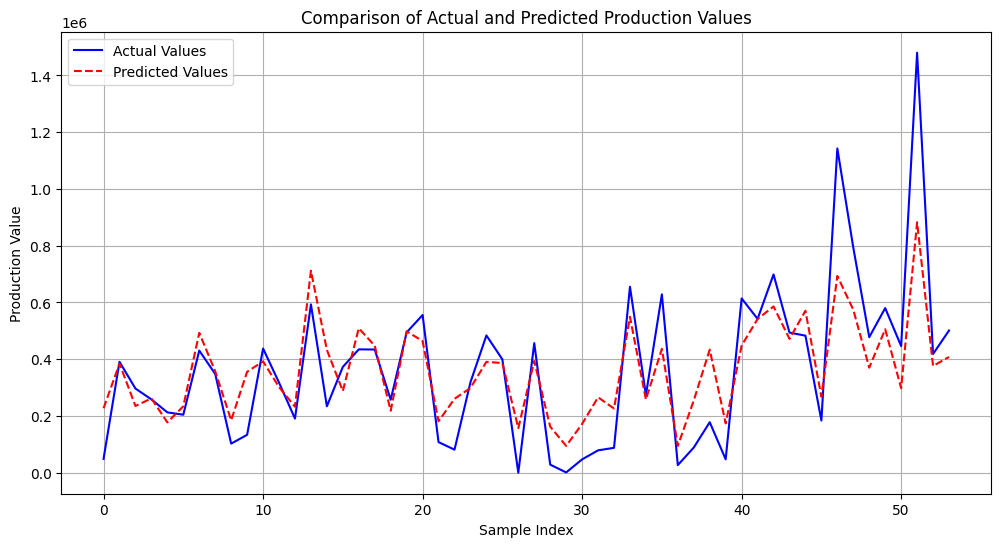

In [ ]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test, KN_y_pred, alpha=0.5, color='blue')  # plot actual vs predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # draw a line through the main diagonal
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the previous operations
# Create a line plot for the actual values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Values', color='blue')  # reset_index for clean plotting
plt.plot(KN_y_pred, label='Predicted Values', linestyle='--', color='red')
plt.title('Comparison of Actual and Predicted Production Values')
plt.xlabel('Sample Index')
plt.ylabel('Production Value')
plt.legend()
plt.grid(True)
plt.show()


# XGBoost Regression model

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #random_state 4 or 120 or 200 was the best

In [ ]:
XGB_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}


xgb_reg = xgb.XGBRegressor()

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=XGB_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_xgb_reg = grid_search.best_estimator_

# Make predictions with the best model
XGB_y_pred = best_xgb_reg.predict(X_test)




Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


### Calculate Performance Metrics

In [ ]:
# Calculate R-squared
r_squared_XGB = r2_score(y_test, XGB_y_pred)
print("R-squared:", r_squared_XGB)

mse_XGB = mean_squared_error(y_test, XGB_y_pred)
print("Mean Squared Error:", mse_XGB)

R-squared: 0.8674416935804519
Mean Squared Error: 10214327021.957344


###Plotting the actual vs predicted values

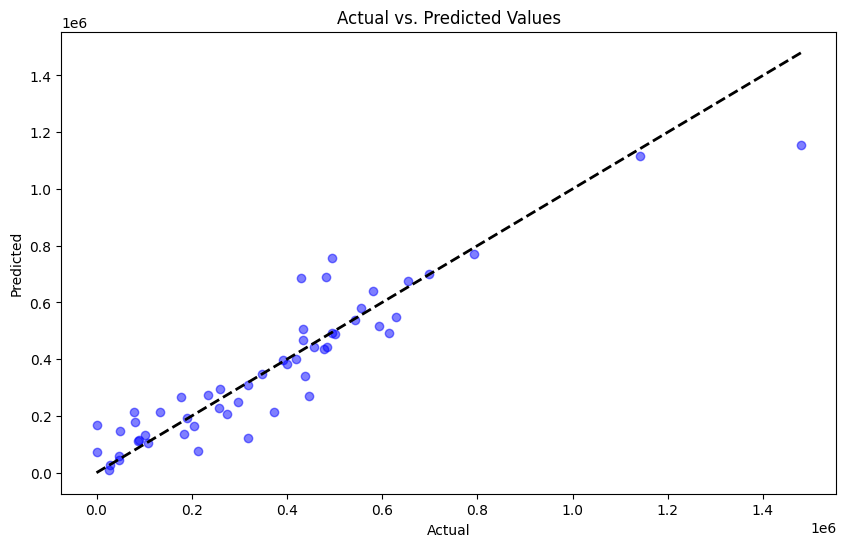

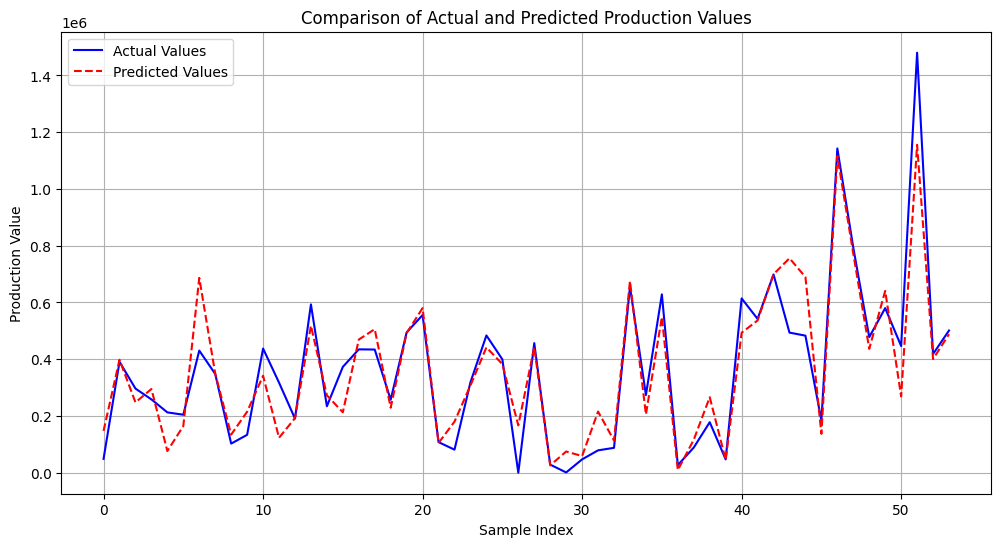

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, XGB_y_pred, alpha=0.5, color='blue')  # plot actual vs predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # draw a line through the main diagonal
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Values', color='blue')  # reset_index for clean plotting
plt.plot(XGB_y_pred, label='Predicted Values', linestyle='--', color='red')
plt.title('Comparison of Actual and Predicted Production Values')
plt.xlabel('Sample Index')
plt.ylabel('Production Value')
plt.legend()
plt.grid(True)
plt.show()


## Implementing explainable AI (XAI)

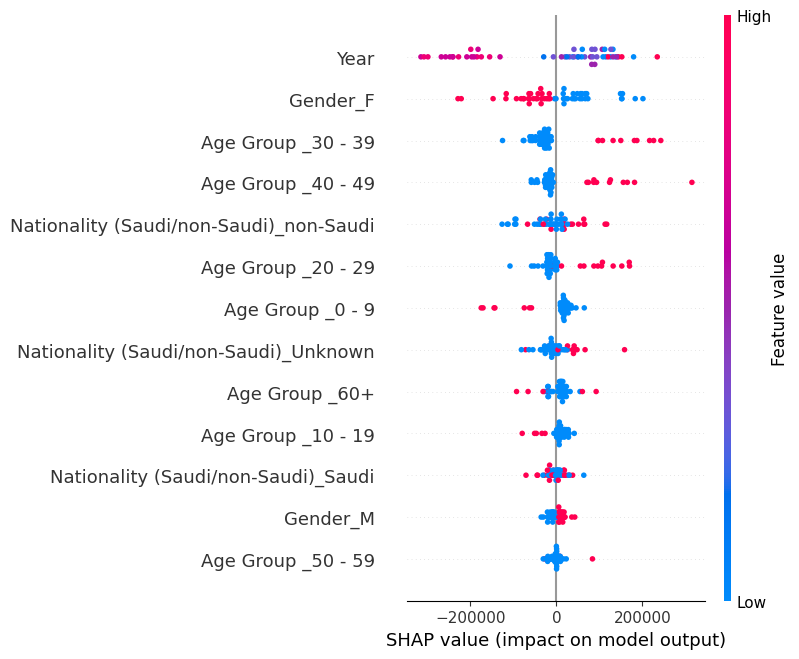

In [ ]:

import shap
# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(best_xgb_reg)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

# Visualize the SHAP values for all predictions in the test set
shap.summary_plot(shap_values, X_test)
